In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random

%matplotlib inline

In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
# PATH_TO_GRAPH = r'models/rcnn_resnet101/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'models/rcnn/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'frozen_models/frozen_sim_mobile/frozen_inference_graph.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_GRAPH = r'frozen_models/frozen_sim_mobile/frozen_inference_graph.pb'

PATH_TO_LABELS = r'label_map.pbtxt'
NUM_CLASSES = 14

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


In [6]:
IMAGE_SIZE = (12, 8)

SCORES
[0.31850502 0.02355937 0.01511165 0.01340114 0.01126694 0.01120809
 0.01099887 0.01049634 0.0097498  0.00965809 0.00912435 0.0082676
 0.00823872 0.0080191  0.00774925 0.00757452 0.0070306  0.00697286
 0.00644875 0.00614945 0.00585853 0.00578108 0.00555691 0.00543886
 0.00529937 0.00498746 0.00487963 0.00473845 0.00457878 0.00449414
 0.00437066 0.00420814 0.00411437 0.00387715 0.00378513 0.00377207
 0.00371879 0.00367917 0.00365975 0.00361557 0.00360904 0.00354986
 0.00351492 0.00333356 0.00332618 0.00323133 0.00317647 0.00316188
 0.00314604 0.00311968]
CLASSES
[2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 1. 1. 2. 4. 2. 2. 2. 3. 1. 3. 3. 3. 1.
 2. 2. 2. 2. 3. 1. 1. 2. 4. 2. 2. 2. 1. 3. 3. 1. 4. 2. 1. 2. 2. 1. 2. 3.
 1. 2.]


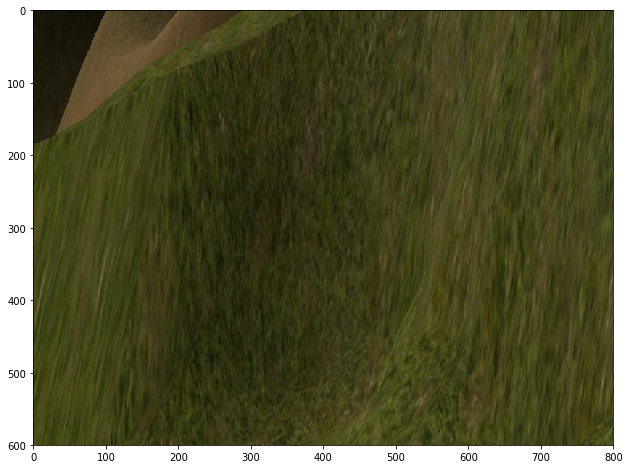

SCORES
[0.9864451  0.9246122  0.05137421 0.03674655 0.01409134 0.01263979
 0.0123092  0.01154319 0.0098001  0.00801392 0.00777102 0.0040683
 0.00397402 0.00388578 0.0036882  0.0035103  0.00327562 0.00326125
 0.0032533  0.00322939 0.00320087 0.00318304 0.00315623 0.0030618
 0.00304486 0.00299115 0.00293723 0.00287737 0.00271446 0.00255435
 0.0025401  0.00242586 0.0021819  0.00217289 0.00216114 0.00215145
 0.00212657 0.00197262 0.00197081 0.00196146 0.00187382 0.00187208
 0.00184466 0.0018286  0.0018125  0.00178973 0.00178292 0.00178278
 0.00177992 0.00170737]
CLASSES
[3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 1. 2. 2.
 2. 1. 1. 2. 3. 2. 2. 2. 2. 2. 4. 1. 2. 3. 2. 4. 2. 2. 2. 2. 1. 3. 1. 3.
 2. 1.]


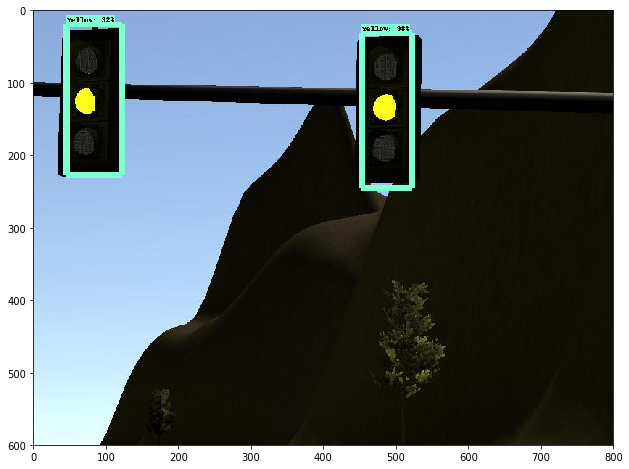

SCORES
[0.31850502 0.02355937 0.01511165 0.01340114 0.01126694 0.01120809
 0.01099887 0.01049634 0.0097498  0.00965809 0.00912435 0.0082676
 0.00823872 0.0080191  0.00774925 0.00757452 0.0070306  0.00697286
 0.00644875 0.00614945 0.00585853 0.00578108 0.00555691 0.00543886
 0.00529937 0.00498746 0.00487963 0.00473845 0.00457878 0.00449414
 0.00437066 0.00420814 0.00411437 0.00387715 0.00378513 0.00377207
 0.00371879 0.00367917 0.00365975 0.00361557 0.00360904 0.00354986
 0.00351492 0.00333356 0.00332618 0.00323133 0.00317647 0.00316188
 0.00314604 0.00311968]
CLASSES
[2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 1. 1. 2. 4. 2. 2. 2. 3. 1. 3. 3. 3. 1.
 2. 2. 2. 2. 3. 1. 1. 2. 4. 2. 2. 2. 1. 3. 3. 1. 4. 2. 1. 2. 2. 1. 2. 3.
 1. 2.]


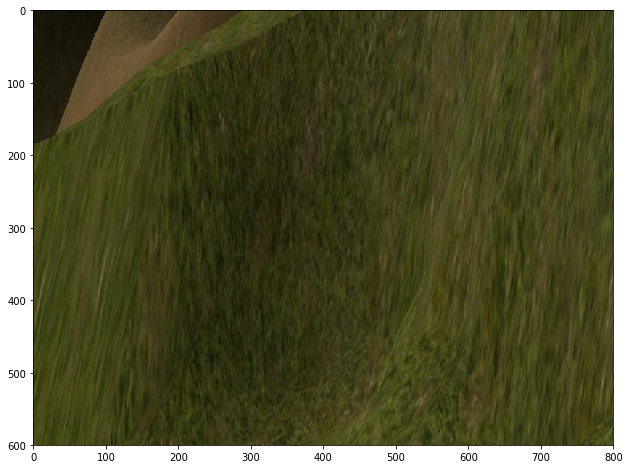

SCORES
[0.94465995 0.38221097 0.30224514 0.06800664 0.05328736 0.03837079
 0.03124637 0.01882632 0.0154213  0.01447157 0.01442656 0.01346997
 0.00988381 0.00836191 0.00777644 0.00670508 0.00632851 0.00588191
 0.00578391 0.00515479 0.00479668 0.00471652 0.00396785 0.00372896
 0.00368714 0.00355208 0.00337107 0.00332238 0.00330363 0.0028885
 0.00281395 0.00276381 0.00273677 0.00258368 0.00238307 0.00236999
 0.00229522 0.0022536  0.0022051  0.00219587 0.00213736 0.00213657
 0.00212107 0.00210381 0.00210113 0.00197249 0.00190826 0.00190425
 0.00190408 0.0018538 ]
CLASSES
[2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 1. 2. 1. 2. 3. 3. 2.
 2. 2.]


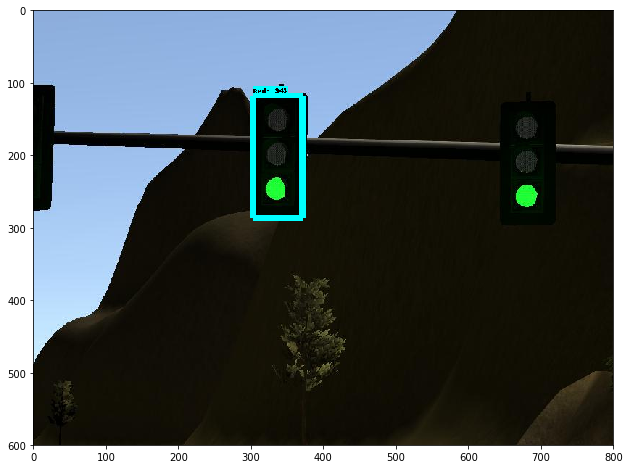

SCORES
[0.94465995 0.38221097 0.30224514 0.06800664 0.05328736 0.03837079
 0.03124637 0.01882632 0.0154213  0.01447157 0.01442656 0.01346997
 0.00988381 0.00836191 0.00777644 0.00670508 0.00632851 0.00588191
 0.00578391 0.00515479 0.00479668 0.00471652 0.00396785 0.00372896
 0.00368714 0.00355208 0.00337107 0.00332238 0.00330363 0.0028885
 0.00281395 0.00276381 0.00273677 0.00258368 0.00238307 0.00236999
 0.00229522 0.0022536  0.0022051  0.00219587 0.00213736 0.00213657
 0.00212107 0.00210381 0.00210113 0.00197249 0.00190826 0.00190425
 0.00190408 0.0018538 ]
CLASSES
[2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 1. 2. 1. 2. 3. 3. 2.
 2. 2.]


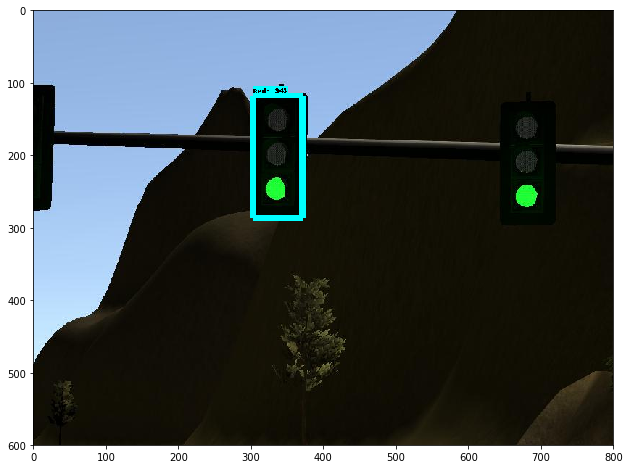

In [9]:
PATH_TO_IMGS = r'test_images_sim'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.png'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

In [9]:
## Test model
PATH_TO_GRAPH = r'frozen_models/ssd_sim_real/frozen_inference_graph.pb'

In [10]:
detection_graph = load_graph(PATH_TO_GRAPH)

SCORES
[9.9469674e-01 7.2565302e-02 1.2059464e-02 5.4903990e-03 3.9941920e-03
 3.0695947e-03 3.0131154e-03 2.6350492e-03 2.3701468e-03 2.2013099e-03
 2.0006257e-03 1.8882387e-03 1.4534945e-03 1.4376738e-03 1.2786759e-03
 1.2703253e-03 1.2195139e-03 1.2186081e-03 1.1864715e-03 1.1477558e-03
 1.1354139e-03 1.1329553e-03 1.1249261e-03 1.0860794e-03 1.0524612e-03
 1.0492501e-03 1.0475428e-03 9.8520122e-04 8.9465093e-04 8.8752666e-04
 8.7343133e-04 8.6960138e-04 8.6390495e-04 8.5812388e-04 8.4996404e-04
 8.4993895e-04 8.4056490e-04 8.3665614e-04 8.3439867e-04 8.2393392e-04
 8.2141435e-04 8.1540906e-04 8.0999057e-04 7.9719024e-04 7.8926486e-04
 7.7993370e-04 7.6971459e-04 7.6220604e-04 7.6025067e-04 7.4911758e-04]
CLASSES
[2. 1. 3. 1. 2. 3. 2. 2. 3. 3. 1. 2. 1. 1. 1. 1. 1. 3. 1. 3. 1. 2. 2. 2.
 2. 3. 3. 2. 1. 1. 3. 2. 3. 2. 1. 1. 2. 3. 1. 1. 2. 1. 2. 2. 3. 3. 3. 2.
 3. 1.]


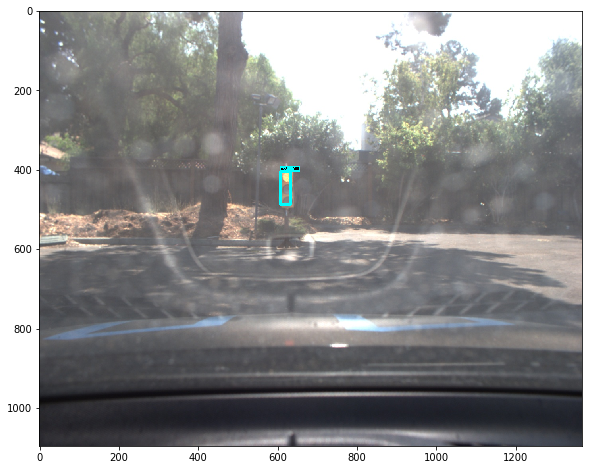

SCORES
[9.9801010e-01 3.2335393e-02 1.0625834e-02 1.0156601e-02 4.2772293e-03
 3.5245370e-03 3.1354635e-03 3.0848917e-03 2.7217008e-03 2.4002814e-03
 2.0362001e-03 1.8222523e-03 1.7180960e-03 1.5643069e-03 1.4197464e-03
 1.3493334e-03 1.2920025e-03 1.2856924e-03 1.2203109e-03 1.1600462e-03
 1.0730533e-03 1.0562284e-03 1.0389453e-03 1.0328356e-03 1.0229669e-03
 1.0160920e-03 1.0063297e-03 9.9327345e-04 9.7774854e-04 9.7018952e-04
 9.4397360e-04 9.4284909e-04 9.1637782e-04 9.0222905e-04 8.9694612e-04
 8.7618874e-04 8.6953893e-04 8.6793507e-04 8.4772811e-04 8.3764526e-04
 7.7659555e-04 7.7067682e-04 7.6861883e-04 7.6418457e-04 7.6066557e-04
 7.5765356e-04 7.5747701e-04 7.4748561e-04 7.4738241e-04 7.4054755e-04]
CLASSES
[1. 1. 2. 3. 3. 1. 3. 3. 3. 1. 1. 3. 1. 3. 2. 3. 2. 3. 1. 3. 2. 3. 2. 1.
 2. 3. 1. 1. 1. 1. 2. 3. 2. 1. 1. 1. 1. 2. 3. 3. 3. 1. 2. 3. 3. 1. 4. 1.
 4. 2.]


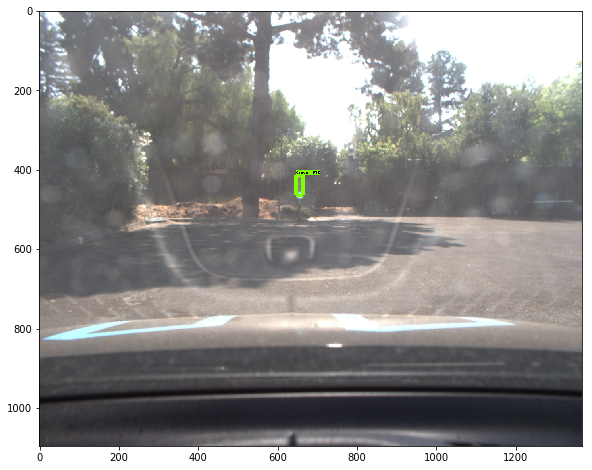

SCORES
[0.7092009  0.54137844 0.00959659 0.00413443 0.00296247 0.00148666
 0.00145161 0.00144986 0.00126001 0.00120899 0.00119688 0.00113111
 0.00112683 0.0011242  0.00111225 0.00109971 0.00109864 0.00109201
 0.00108416 0.00107789 0.00107484 0.00104318 0.00101898 0.00101803
 0.00100595 0.00097772 0.00097588 0.00092991 0.00091606 0.00091133
 0.00090647 0.00090058 0.00088611 0.00086834 0.00086675 0.00086165
 0.00085694 0.00085126 0.00083823 0.00083188 0.00081067 0.00080705
 0.00080655 0.00079801 0.00079788 0.00079065 0.00077291 0.00076811
 0.00076241 0.00075993]
CLASSES
[3. 3. 2. 3. 2. 3. 2. 3. 2. 2. 1. 2. 1. 2. 2. 2. 3. 4. 2. 1. 3. 3. 2. 2.
 2. 3. 2. 3. 1. 3. 1. 4. 3. 1. 3. 1. 1. 3. 3. 3. 1. 3. 1. 2. 2. 1. 2. 1.
 4. 1.]


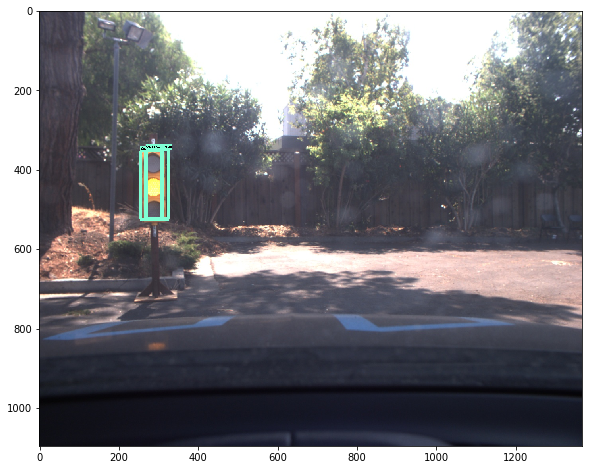

SCORES
[9.9801010e-01 3.2335393e-02 1.0625834e-02 1.0156601e-02 4.2772293e-03
 3.5245370e-03 3.1354635e-03 3.0848917e-03 2.7217008e-03 2.4002814e-03
 2.0362001e-03 1.8222523e-03 1.7180960e-03 1.5643069e-03 1.4197464e-03
 1.3493334e-03 1.2920025e-03 1.2856924e-03 1.2203109e-03 1.1600462e-03
 1.0730533e-03 1.0562284e-03 1.0389453e-03 1.0328356e-03 1.0229669e-03
 1.0160920e-03 1.0063297e-03 9.9327345e-04 9.7774854e-04 9.7018952e-04
 9.4397360e-04 9.4284909e-04 9.1637782e-04 9.0222905e-04 8.9694612e-04
 8.7618874e-04 8.6953893e-04 8.6793507e-04 8.4772811e-04 8.3764526e-04
 7.7659555e-04 7.7067682e-04 7.6861883e-04 7.6418457e-04 7.6066557e-04
 7.5765356e-04 7.5747701e-04 7.4748561e-04 7.4738241e-04 7.4054755e-04]
CLASSES
[1. 1. 2. 3. 3. 1. 3. 3. 3. 1. 1. 3. 1. 3. 2. 3. 2. 3. 1. 3. 2. 3. 2. 1.
 2. 3. 1. 1. 1. 1. 2. 3. 2. 1. 1. 1. 1. 2. 3. 3. 3. 1. 2. 3. 3. 1. 4. 1.
 4. 2.]


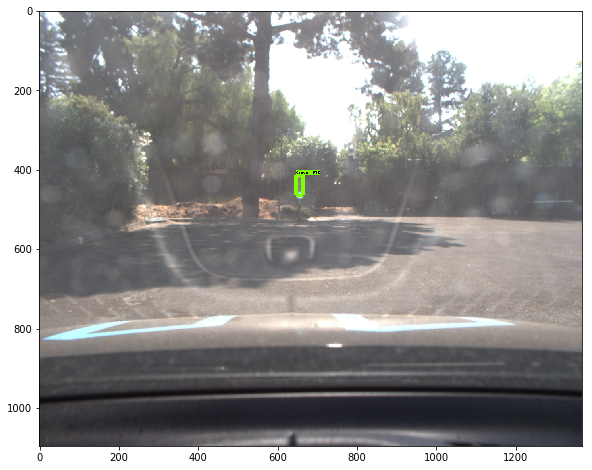

SCORES
[9.9801010e-01 3.2335393e-02 1.0625834e-02 1.0156601e-02 4.2772293e-03
 3.5245370e-03 3.1354635e-03 3.0848917e-03 2.7217008e-03 2.4002814e-03
 2.0362001e-03 1.8222523e-03 1.7180960e-03 1.5643069e-03 1.4197464e-03
 1.3493334e-03 1.2920025e-03 1.2856924e-03 1.2203109e-03 1.1600462e-03
 1.0730533e-03 1.0562284e-03 1.0389453e-03 1.0328356e-03 1.0229669e-03
 1.0160920e-03 1.0063297e-03 9.9327345e-04 9.7774854e-04 9.7018952e-04
 9.4397360e-04 9.4284909e-04 9.1637782e-04 9.0222905e-04 8.9694612e-04
 8.7618874e-04 8.6953893e-04 8.6793507e-04 8.4772811e-04 8.3764526e-04
 7.7659555e-04 7.7067682e-04 7.6861883e-04 7.6418457e-04 7.6066557e-04
 7.5765356e-04 7.5747701e-04 7.4748561e-04 7.4738241e-04 7.4054755e-04]
CLASSES
[1. 1. 2. 3. 3. 1. 3. 3. 3. 1. 1. 3. 1. 3. 2. 3. 2. 3. 1. 3. 2. 3. 2. 1.
 2. 3. 1. 1. 1. 1. 2. 3. 2. 1. 1. 1. 1. 2. 3. 3. 3. 1. 2. 3. 3. 1. 4. 1.
 4. 2.]


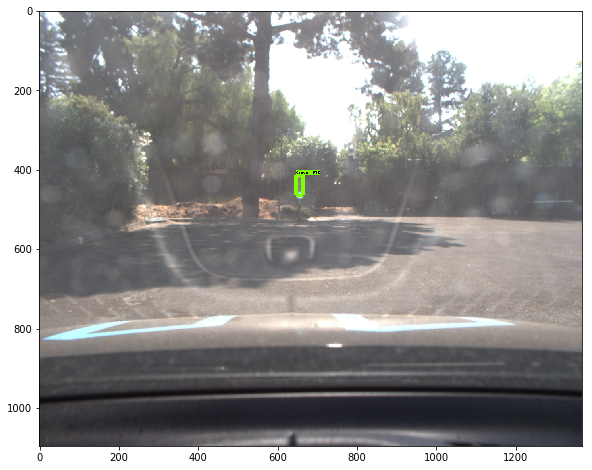

SCORES
[9.9969590e-01 9.7403442e-03 5.4304088e-03 3.3352280e-03 1.8947627e-03
 1.6614540e-03 1.6080881e-03 1.1437377e-03 1.1166369e-03 1.0640946e-03
 1.0203822e-03 1.0078528e-03 9.5852831e-04 9.5291645e-04 9.4176625e-04
 9.2610420e-04 9.2586910e-04 8.5253007e-04 8.5085956e-04 8.4409321e-04
 8.2504319e-04 8.1829570e-04 8.0341118e-04 7.9340959e-04 7.8877877e-04
 7.8770350e-04 7.8523078e-04 7.8452885e-04 7.5936329e-04 7.5599866e-04
 7.5186219e-04 7.4809027e-04 7.4749422e-04 7.1365252e-04 7.0813647e-04
 7.0343731e-04 7.0275215e-04 6.9789041e-04 6.9203234e-04 6.9043855e-04
 6.8286911e-04 6.8153016e-04 6.7770912e-04 6.7664456e-04 6.7478447e-04
 6.5882300e-04 6.5225991e-04 6.4909138e-04 6.4258813e-04 6.3347397e-04]
CLASSES
[2. 1. 2. 2. 2. 3. 2. 2. 2. 2. 2. 3. 2. 4. 3. 1. 3. 3. 1. 1. 1. 2. 1. 4.
 3. 1. 1. 4. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 4. 2. 1. 1. 1. 1.
 1. 3.]


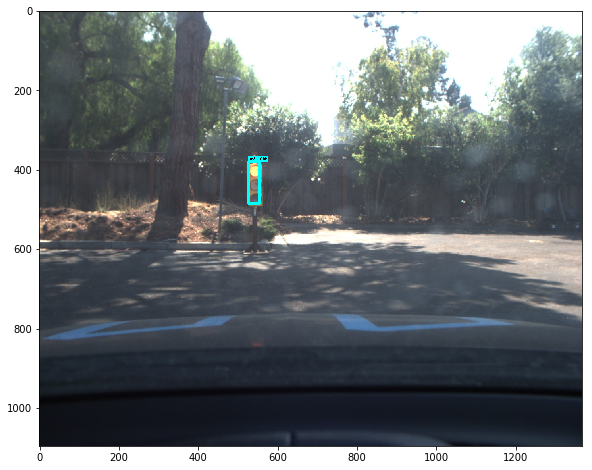

SCORES
[9.9801010e-01 3.2335393e-02 1.0625834e-02 1.0156601e-02 4.2772293e-03
 3.5245370e-03 3.1354635e-03 3.0848917e-03 2.7217008e-03 2.4002814e-03
 2.0362001e-03 1.8222523e-03 1.7180960e-03 1.5643069e-03 1.4197464e-03
 1.3493334e-03 1.2920025e-03 1.2856924e-03 1.2203109e-03 1.1600462e-03
 1.0730533e-03 1.0562284e-03 1.0389453e-03 1.0328356e-03 1.0229669e-03
 1.0160920e-03 1.0063297e-03 9.9327345e-04 9.7774854e-04 9.7018952e-04
 9.4397360e-04 9.4284909e-04 9.1637782e-04 9.0222905e-04 8.9694612e-04
 8.7618874e-04 8.6953893e-04 8.6793507e-04 8.4772811e-04 8.3764526e-04
 7.7659555e-04 7.7067682e-04 7.6861883e-04 7.6418457e-04 7.6066557e-04
 7.5765356e-04 7.5747701e-04 7.4748561e-04 7.4738241e-04 7.4054755e-04]
CLASSES
[1. 1. 2. 3. 3. 1. 3. 3. 3. 1. 1. 3. 1. 3. 2. 3. 2. 3. 1. 3. 2. 3. 2. 1.
 2. 3. 1. 1. 1. 1. 2. 3. 2. 1. 1. 1. 1. 2. 3. 3. 3. 1. 2. 3. 3. 1. 4. 1.
 4. 2.]


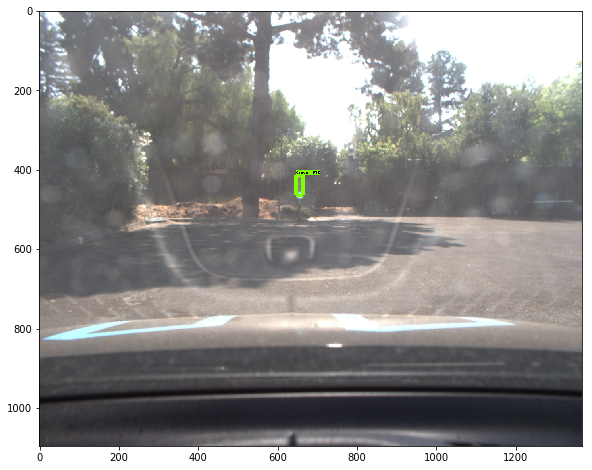

SCORES
[9.9986589e-01 4.7990378e-02 8.0699082e-03 5.5184648e-03 4.3516839e-03
 3.6221792e-03 2.2859909e-03 1.8706466e-03 1.2881064e-03 1.2570956e-03
 1.2388037e-03 1.2051453e-03 1.1966970e-03 1.1732181e-03 1.1659985e-03
 1.1142291e-03 1.1085676e-03 9.6665992e-04 9.6283155e-04 9.5649937e-04
 9.4984635e-04 9.4712438e-04 9.3861588e-04 9.3834352e-04 9.3368511e-04
 9.3184231e-04 9.0958097e-04 9.0691220e-04 9.0665865e-04 9.0642920e-04
 8.9828932e-04 8.8527374e-04 8.7259867e-04 8.5771311e-04 8.3345862e-04
 8.2696334e-04 8.1906491e-04 8.0265134e-04 7.9465576e-04 7.9308124e-04
 7.8419474e-04 7.8354002e-04 7.7587919e-04 7.7038159e-04 7.6134212e-04
 7.5942127e-04 7.5831730e-04 7.5147819e-04 7.3920336e-04 7.3278195e-04]
CLASSES
[2. 3. 1. 2. 2. 2. 2. 2. 2. 3. 1. 2. 3. 1. 2. 2. 2. 2. 1. 4. 2. 2. 2. 3.
 3. 2. 3. 4. 2. 3. 2. 2. 2. 3. 3. 2. 2. 3. 1. 2. 3. 2. 2. 2. 1. 2. 1. 3.
 1. 4.]


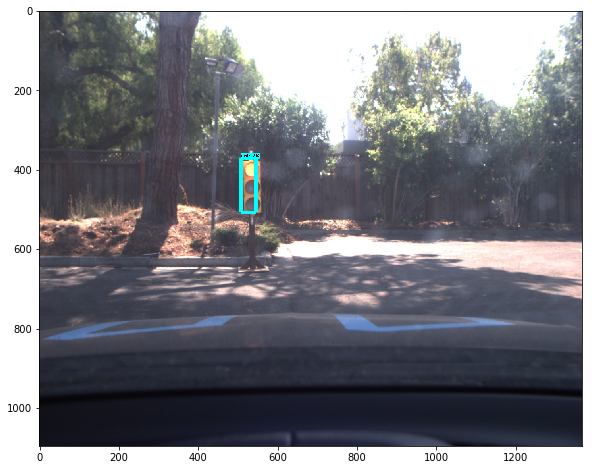

SCORES
[9.9469674e-01 7.2565302e-02 1.2059464e-02 5.4903990e-03 3.9941920e-03
 3.0695947e-03 3.0131154e-03 2.6350492e-03 2.3701468e-03 2.2013099e-03
 2.0006257e-03 1.8882387e-03 1.4534945e-03 1.4376738e-03 1.2786759e-03
 1.2703253e-03 1.2195139e-03 1.2186081e-03 1.1864715e-03 1.1477558e-03
 1.1354139e-03 1.1329553e-03 1.1249261e-03 1.0860794e-03 1.0524612e-03
 1.0492501e-03 1.0475428e-03 9.8520122e-04 8.9465093e-04 8.8752666e-04
 8.7343133e-04 8.6960138e-04 8.6390495e-04 8.5812388e-04 8.4996404e-04
 8.4993895e-04 8.4056490e-04 8.3665614e-04 8.3439867e-04 8.2393392e-04
 8.2141435e-04 8.1540906e-04 8.0999057e-04 7.9719024e-04 7.8926486e-04
 7.7993370e-04 7.6971459e-04 7.6220604e-04 7.6025067e-04 7.4911758e-04]
CLASSES
[2. 1. 3. 1. 2. 3. 2. 2. 3. 3. 1. 2. 1. 1. 1. 1. 1. 3. 1. 3. 1. 2. 2. 2.
 2. 3. 3. 2. 1. 1. 3. 2. 3. 2. 1. 1. 2. 3. 1. 1. 2. 1. 2. 2. 3. 3. 3. 2.
 3. 1.]


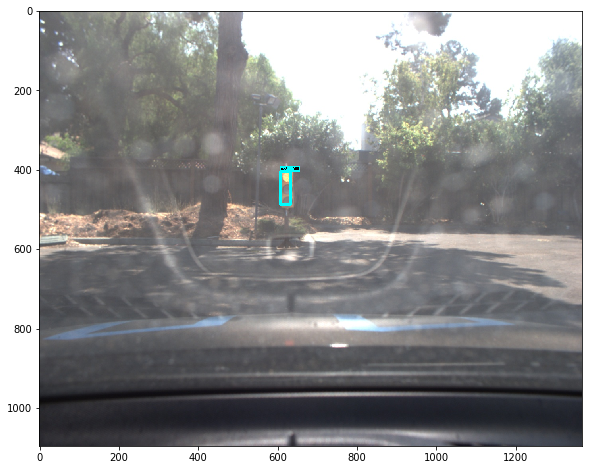

In [11]:
PATH_TO_IMGS = r'test_images_udacity'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

SCORES
[0.790066   0.6132841  0.47444242 0.25430712 0.1489912  0.13420711
 0.03943706 0.03073554 0.03004283 0.0295106  0.01977152 0.01506766
 0.0149864  0.01496927 0.0142261  0.01334795 0.01334699 0.01303731
 0.01265464 0.01123309 0.01007905 0.00989841 0.00903204 0.00898145
 0.00860957 0.00842421 0.00811519 0.00790013 0.0075239  0.00677567
 0.00670558 0.00661154 0.00658785 0.00658369 0.00657168 0.00653376
 0.00643678 0.00637281 0.00616924 0.00609272 0.00574268 0.00556858
 0.00555531 0.00545497 0.00545225 0.00532959 0.00518171 0.00500629
 0.00498559 0.00496397]
CLASSES
[3. 3. 2. 3. 3. 3. 1. 3. 3. 1. 2. 2. 3. 3. 3. 3. 2. 3. 3. 3. 2. 1. 3. 1.
 2. 1. 1. 3. 3. 3. 1. 3. 1. 3. 3. 2. 1. 2. 3. 2. 4. 1. 2. 1. 1. 1. 3. 4.
 4. 2.]


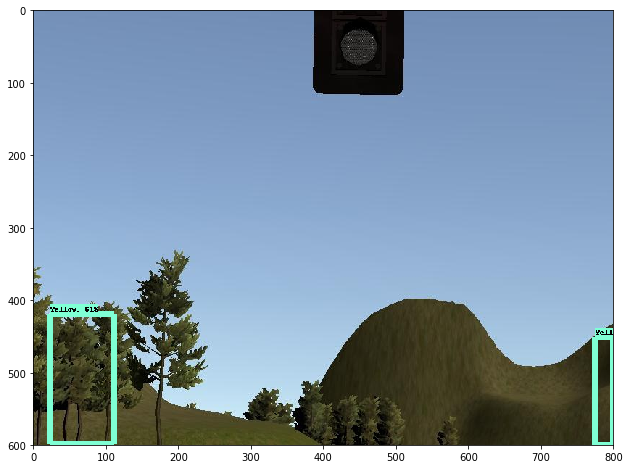

SCORES
[0.73880917 0.67233634 0.6015175  0.24686311 0.20774078 0.10947331
 0.09975359 0.06849775 0.06841703 0.06468316 0.04405301 0.03707244
 0.03361697 0.02172779 0.02133119 0.02030676 0.01961683 0.01779511
 0.01534895 0.01529704 0.01375292 0.01371668 0.01237347 0.01229139
 0.01195412 0.01031856 0.01030432 0.01018908 0.0087774  0.00870983
 0.00855821 0.00850684 0.00830416 0.00802447 0.00787683 0.00767672
 0.00766311 0.0074096  0.00697985 0.00687767 0.00654802 0.00650064
 0.0064609  0.00622469 0.00603803 0.0060122  0.00582785 0.00581226
 0.00577588 0.00557331]
CLASSES
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 2. 2. 1. 3. 3. 4. 3. 1. 1. 3. 3.
 3. 2. 1. 3. 3. 3. 1. 2. 2. 1. 3. 1. 2. 1. 4. 4. 1. 4. 1. 4. 1. 1. 2. 3.
 1. 1.]


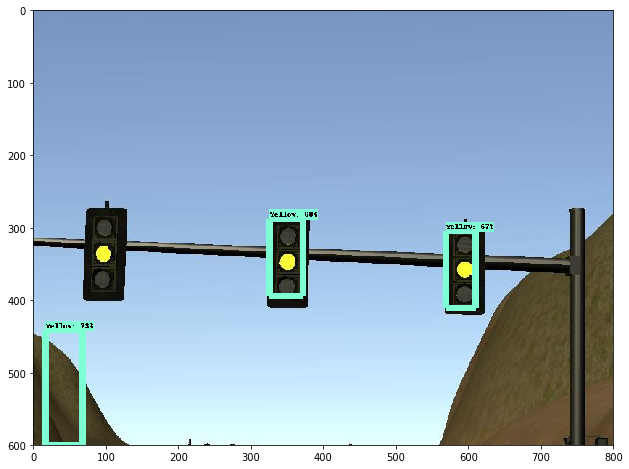

SCORES
[0.77858746 0.6124943  0.05921315 0.02606051 0.02403857 0.0232965
 0.01828206 0.0140743  0.01391538 0.01196504 0.01111606 0.01102388
 0.00882208 0.00868228 0.00823625 0.00818028 0.00787622 0.00703362
 0.00697342 0.00690811 0.00652478 0.00649418 0.00632131 0.00623475
 0.00605698 0.00604374 0.00583883 0.00576839 0.00568304 0.00568271
 0.00568139 0.00558651 0.00510759 0.00501587 0.00493632 0.00493327
 0.00492425 0.0049027  0.00487895 0.00453269 0.00452202 0.00444268
 0.00439874 0.0043251  0.00430948 0.00430774 0.00420816 0.00417196
 0.00414154 0.00411221]
CLASSES
[3. 3. 3. 3. 2. 1. 3. 3. 3. 3. 3. 1. 2. 3. 3. 1. 2. 2. 3. 1. 2. 3. 3. 3.
 4. 1. 3. 1. 1. 3. 3. 4. 2. 3. 1. 3. 3. 1. 4. 1. 1. 3. 3. 3. 3. 1. 1. 1.
 1. 4.]


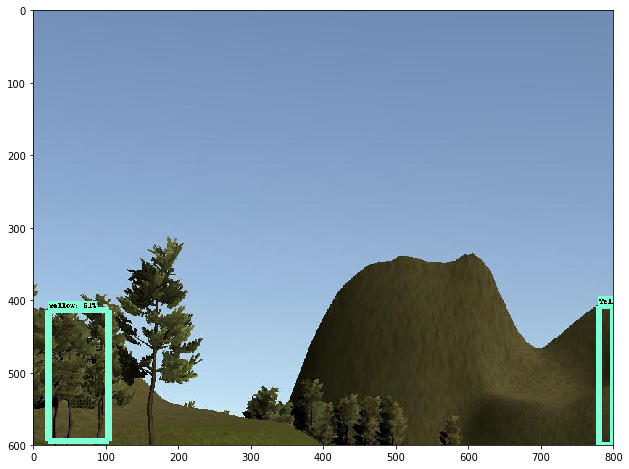

SCORES
[0.984985   0.5256161  0.5099143  0.32850957 0.19836842 0.16698067
 0.08268388 0.04312772 0.04089862 0.0331773  0.03097939 0.02903633
 0.02646455 0.02608181 0.02440414 0.01794395 0.01716288 0.01467574
 0.01374911 0.0087573  0.00874551 0.00859813 0.00839254 0.00587231
 0.00576143 0.0057551  0.00562498 0.00524289 0.00485255 0.00467397
 0.00463553 0.00460618 0.00453057 0.00440991 0.00438933 0.00427424
 0.00423485 0.00421734 0.00409709 0.00408965 0.00398283 0.0038673
 0.00381856 0.00376771 0.00372721 0.00365271 0.00363576 0.00354458
 0.00351954 0.00351736]
CLASSES
[2. 3. 1. 1. 2. 3. 3. 3. 1. 1. 1. 1. 3. 3. 3. 3. 1. 3. 3. 3. 1. 1. 3. 1.
 1. 2. 2. 3. 1. 2. 3. 3. 1. 1. 3. 1. 2. 1. 3. 3. 3. 3. 1. 2. 3. 3. 1. 1.
 1. 2.]


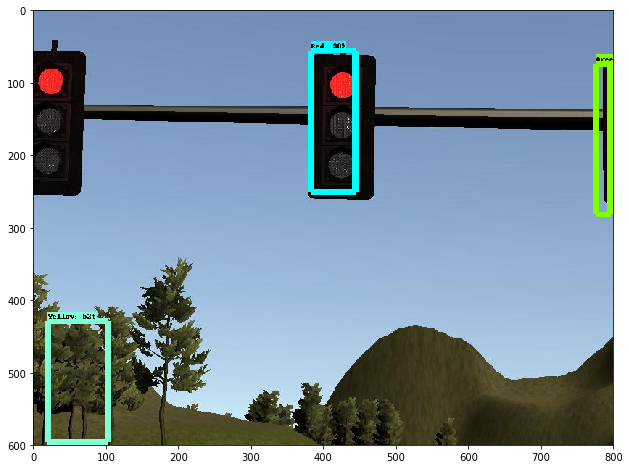

SCORES
[0.918003   0.79793835 0.55811167 0.3908842  0.29277688 0.25740826
 0.192494   0.06322823 0.0089121  0.00842164 0.00773993 0.00580746
 0.00548485 0.0049839  0.00426844 0.00391725 0.00385552 0.00379436
 0.00378811 0.00364448 0.00350491 0.00343829 0.00319192 0.00314848
 0.00308666 0.0030775  0.00298558 0.00293625 0.00291309 0.00271038
 0.00259681 0.00259131 0.00258905 0.00258461 0.00257926 0.00256791
 0.00245574 0.00244919 0.00244176 0.0024315  0.0024161  0.00238523
 0.00238466 0.00234512 0.00232168 0.00229983 0.0022964  0.00228255
 0.00226309 0.00220531]
CLASSES
[1. 1. 3. 3. 2. 1. 1. 2. 3. 2. 2. 3. 1. 1. 3. 3. 1. 1. 1. 3. 2. 1. 3. 2.
 3. 1. 2. 4. 4. 1. 4. 2. 3. 3. 3. 1. 2. 3. 3. 3. 2. 1. 2. 2. 1. 3. 1. 3.
 1. 4.]


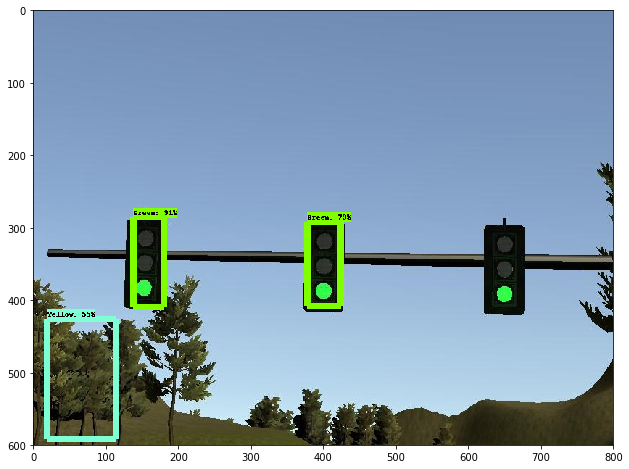

SCORES
[0.99760073 0.963504   0.95570904 0.31287214 0.27312148 0.210687
 0.16061586 0.10183861 0.08702548 0.06191191 0.04943201 0.04497984
 0.04404974 0.04201416 0.03930617 0.03795257 0.03554409 0.03340279
 0.03162331 0.03059715 0.03023048 0.02864946 0.02582816 0.02397405
 0.02266451 0.02250519 0.02083486 0.02072245 0.01830474 0.01807572
 0.01803761 0.01787602 0.01676773 0.01627197 0.01411837 0.01281748
 0.01248175 0.01207864 0.0114521  0.01118498 0.01000674 0.00966102
 0.00938127 0.00906505 0.00841601 0.00804466 0.0075441  0.00704342
 0.00656482 0.00645638]
CLASSES
[1. 3. 3. 2. 2. 3. 3. 3. 3. 2. 2. 2. 2. 1. 3. 1. 2. 3. 3. 3. 3. 1. 2. 4.
 4. 1. 3. 4. 1. 4. 2. 4. 3. 1. 3. 1. 3. 1. 2. 1. 3. 4. 2. 1. 3. 3. 1. 4.
 4. 3.]


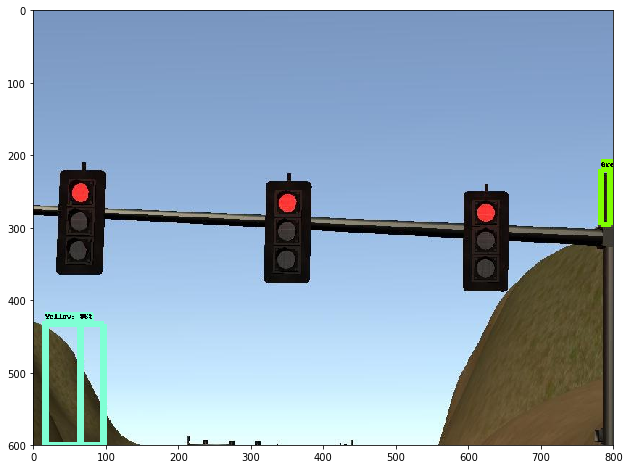

SCORES
[0.88841265 0.862165   0.78180045 0.1415435  0.08182988 0.01961479
 0.01539276 0.01208046 0.0109099  0.00553985 0.00505222 0.00452459
 0.00406149 0.00398633 0.00384002 0.00375319 0.00371971 0.00368996
 0.0034653  0.00339108 0.00329012 0.00312382 0.00305623 0.00300689
 0.0029883  0.00296448 0.00289267 0.00288284 0.00283022 0.00280307
 0.00274143 0.00266386 0.00266291 0.00264407 0.00263116 0.00262697
 0.00255527 0.00254138 0.00253318 0.00246792 0.00245584 0.00243537
 0.00240744 0.00237684 0.00235082 0.00230835 0.00224246 0.00223741
 0.00223338 0.00220705]
CLASSES
[3. 3. 3. 1. 3. 3. 3. 2. 2. 1. 1. 3. 3. 1. 1. 3. 1. 2. 1. 3. 2. 1. 1. 3.
 3. 4. 1. 4. 3. 3. 3. 1. 2. 3. 3. 3. 2. 4. 3. 3. 2. 3. 2. 3. 2. 3. 1. 3.
 3. 1.]


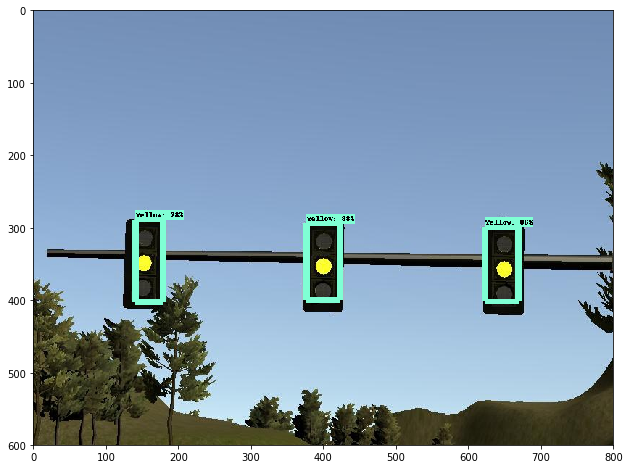

SCORES
[0.9968118  0.967132   0.9613139  0.23636162 0.14693002 0.11418833
 0.09406415 0.09123283 0.08090187 0.07508916 0.07460362 0.04747735
 0.04450715 0.0382877  0.03517831 0.03335504 0.03226314 0.03169137
 0.02996777 0.02933687 0.02835656 0.0268661  0.02573027 0.02543804
 0.02282147 0.02122588 0.01960716 0.01845945 0.01772196 0.01599998
 0.01509009 0.01488777 0.01426437 0.0142254  0.01413991 0.0140534
 0.01294276 0.01262539 0.01226493 0.01064118 0.00985676 0.00979929
 0.00936523 0.00823051 0.00792746 0.00786974 0.00738382 0.00705189
 0.00698286 0.00660571]
CLASSES
[1. 3. 3. 3. 3. 2. 2. 3. 1. 2. 3. 2. 3. 1. 2. 1. 3. 2. 3. 3. 3. 4. 2. 1.
 2. 4. 1. 3. 4. 4. 3. 4. 1. 2. 2. 3. 1. 3. 1. 1. 1. 2. 2. 4. 3. 3. 3. 1.
 2. 1.]


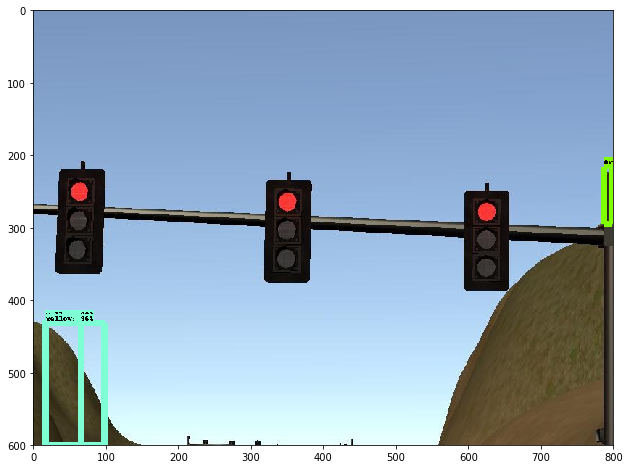

SCORES
[0.586762   0.26587102 0.14927328 0.13380075 0.09024585 0.06169117
 0.05621925 0.04407511 0.03927806 0.03349607 0.0277104  0.02318206
 0.01446243 0.01258864 0.01176128 0.00899564 0.00747182 0.00660005
 0.00655682 0.00647352 0.0063595  0.00619772 0.00583717 0.00578141
 0.00557785 0.00537818 0.00528076 0.00485885 0.00474869 0.004484
 0.00433729 0.0042511  0.00421297 0.00415828 0.00412613 0.00406928
 0.0039251  0.00386859 0.00384772 0.00377183 0.00371328 0.00371029
 0.00366262 0.00358786 0.0034717  0.00334742 0.00332845 0.00328552
 0.00326544 0.00324869]
CLASSES
[1. 3. 3. 1. 3. 2. 2. 3. 3. 1. 3. 3. 3. 1. 2. 3. 1. 2. 3. 1. 1. 1. 3. 2.
 1. 1. 1. 1. 3. 1. 1. 1. 3. 4. 1. 3. 1. 3. 3. 1. 2. 3. 3. 2. 3. 3. 1. 3.
 1. 4.]


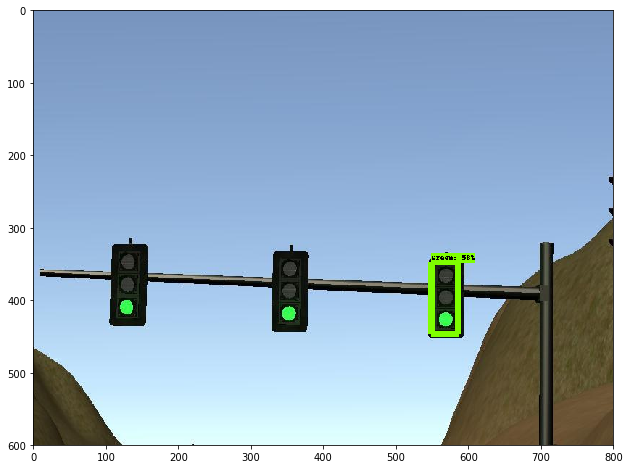

SCORES
[0.790066   0.6132841  0.47444242 0.25430712 0.1489912  0.13420711
 0.03943706 0.03073554 0.03004283 0.0295106  0.01977152 0.01506766
 0.0149864  0.01496927 0.0142261  0.01334795 0.01334699 0.01303731
 0.01265464 0.01123309 0.01007905 0.00989841 0.00903204 0.00898145
 0.00860957 0.00842421 0.00811519 0.00790013 0.0075239  0.00677567
 0.00670558 0.00661154 0.00658785 0.00658369 0.00657168 0.00653376
 0.00643678 0.00637281 0.00616924 0.00609272 0.00574268 0.00556858
 0.00555531 0.00545497 0.00545225 0.00532959 0.00518171 0.00500629
 0.00498559 0.00496397]
CLASSES
[3. 3. 2. 3. 3. 3. 1. 3. 3. 1. 2. 2. 3. 3. 3. 3. 2. 3. 3. 3. 2. 1. 3. 1.
 2. 1. 1. 3. 3. 3. 1. 3. 1. 3. 3. 2. 1. 2. 3. 2. 4. 1. 2. 1. 1. 1. 3. 4.
 4. 2.]


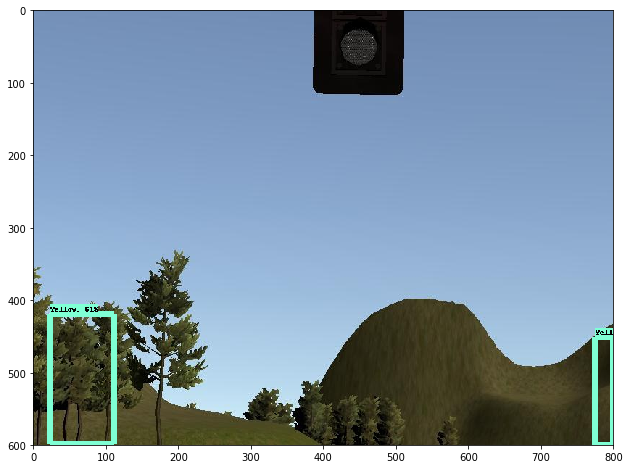

SCORES
[0.9968118  0.967132   0.9613139  0.23636162 0.14693002 0.11418833
 0.09406415 0.09123283 0.08090187 0.07508916 0.07460362 0.04747735
 0.04450715 0.0382877  0.03517831 0.03335504 0.03226314 0.03169137
 0.02996777 0.02933687 0.02835656 0.0268661  0.02573027 0.02543804
 0.02282147 0.02122588 0.01960716 0.01845945 0.01772196 0.01599998
 0.01509009 0.01488777 0.01426437 0.0142254  0.01413991 0.0140534
 0.01294276 0.01262539 0.01226493 0.01064118 0.00985676 0.00979929
 0.00936523 0.00823051 0.00792746 0.00786974 0.00738382 0.00705189
 0.00698286 0.00660571]
CLASSES
[1. 3. 3. 3. 3. 2. 2. 3. 1. 2. 3. 2. 3. 1. 2. 1. 3. 2. 3. 3. 3. 4. 2. 1.
 2. 4. 1. 3. 4. 4. 3. 4. 1. 2. 2. 3. 1. 3. 1. 1. 1. 2. 2. 4. 3. 3. 3. 1.
 2. 1.]


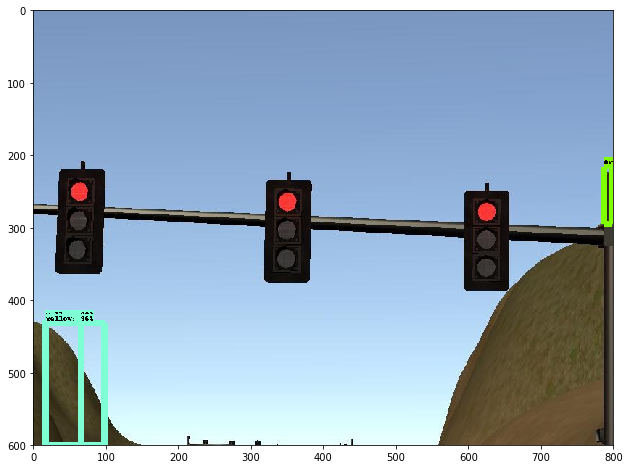

In [12]:
PATH_TO_IMGS = r'test_images_sim'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
random.shuffle(TEST_IMGS)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break